In [1]:
!mkdir -p dataset/DML-HDR
!wget http://dml.ece.ubc.ca/data/DML-HDR/HDRs/ChristmasTree.zip
!unzip ChristmasTree.zip -d ChristmasTree
!rm ChristmasTree.zip
!mv ChristmasTree/ChristmasTree ChristmasTree/hdr_images
!mv ChristmasTree dataset/DML-HDR/

--2022-04-14 03:43:02--  http://dml.ece.ubc.ca/data/DML-HDR/HDRs/ChristmasTree.zip
Resolving dml.ece.ubc.ca (dml.ece.ubc.ca)... 142.103.83.163
Connecting to dml.ece.ubc.ca (dml.ece.ubc.ca)|142.103.83.163|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1877224654 (1.7G) [application/zip]
Saving to: ‘ChristmasTree.zip’

ChristmasTree.zip   100%[===================>]   1.75G  5.70MB/s    in 4m 14s  

2022-04-14 03:47:16 (7.06 MB/s) - ‘ChristmasTree.zip’ saved [1877224654/1877224654]

Archive:  ChristmasTree.zip
   creating: ChristmasTree/ChristmasTree/
  inflating: ChristmasTree/ChristmasTree/2917.hdr  
  inflating: ChristmasTree/ChristmasTree/2918.hdr  
  inflating: ChristmasTree/ChristmasTree/2919.hdr  
  inflating: ChristmasTree/ChristmasTree/2920.hdr  
  inflating: ChristmasTree/ChristmasTree/2921.hdr  
  inflating: ChristmasTree/ChristmasTree/2922.hdr  
  inflating: ChristmasTree/ChristmasTree/2923.hdr  
  inflating: ChristmasTree/ChristmasTree/2924.hdr  
  i

In [2]:
import os 
import sys
import glob 
import matplotlib.pyplot as plt
import numpy as np
import cv2

from unsupervised_hdr import UnsupervisedHDRModel
from unsupervised_hdr.tools.io import write_hdr_images, write_hdr_to_mp4

In [3]:
def exposure(img, v: float):
    return (img * (2**v) ** (1 / 2.2))
hdr_dir = "dataset/DML-HDR/ChristmasTree/hdr_images"
img_path_list = sorted(glob.glob(os.path.join(hdr_dir, "*.hdr")))
img = cv2.imread(img_path_list[0], flags=cv2.IMREAD_ANYDEPTH)


In [4]:
fourcc = cv2.VideoWriter_fourcc('m', 'p', '4', 'v')

video = cv2.VideoWriter(os.path.join(hdr_dir, "video.mp4") ,fourcc, 30.0, img.shape[:2][::-1])
if not video.isOpened():
    print("can't be opened")
    sys.exit()
for p in img_path_list:
    img = cv2.imread(p, flags=cv2.IMREAD_ANYDEPTH)
    img = (img * 255).clip(0, 255).astype(np.uint8)
    # img = (exposure(img.astype(np.float32), -4.)*255).clip(0, 255).astype(np.uint8)
    video.write(img)
video.release()


In [5]:

dataset_path = "dataset/DML-HDR/ChristmasTree"

In [6]:
model = UnsupervisedHDRModel(
        video_path=os.path.join(dataset_path, "hdr_images/video.mp4"),
        encoder_lr= 1e-4,
        decoder_lr= 1e-4,
        num_worker= 1,
        device_ids = 0,
        output_dir= "log/ChristmasTree")

In [7]:
model.fit(max_epoch=64, batch_size=1)

  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 0 best_loss:0.0613 loss_delta:0.0169 loss_image:0.0444 loss:0.0613 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 1 best_loss:0.0561 loss_delta:0.0138 loss_image:0.0423 loss:0.0561 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 2 best_loss:0.0561 loss_delta:0.0128 loss_image:0.0436 loss:0.0563 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 3 best_loss:0.0526 loss_delta:0.0121 loss_image:0.0405 loss:0.0526 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 4 best_loss:0.0526 loss_delta:0.0132 loss_image:0.0427 loss:0.0559 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 5 best_loss:0.0466 loss_delta:0.01 loss_image:0.0367 loss:0.0466 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 6 best_loss:0.0448 loss_delta:0.0096 loss_image:0.0352 loss:0.0448 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 7 best_loss:0.0446 loss_delta:0.0098 loss_image:0.0348 loss:0.0446 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 8 best_loss:0.0445 loss_delta:0.01 loss_image:0.0345 loss:0.0445 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 9 best_loss:0.0418 loss_delta:0.0088 loss_image:0.033 loss:0.0418 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 10 best_loss:0.0418 loss_delta:0.0091 loss_image:0.0328 loss:0.0419 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 11 best_loss:0.0418 loss_delta:0.0102 loss_image:0.0348 loss:0.045 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 12 best_loss:0.0414 loss_delta:0.0086 loss_image:0.0328 loss:0.0414 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 13 best_loss:0.0411 loss_delta:0.0089 loss_image:0.0322 loss:0.0411 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 14 best_loss:0.0411 loss_delta:0.0083 loss_image:0.0332 loss:0.0416 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 15 best_loss:0.0411 loss_delta:0.0091 loss_image:0.0339 loss:0.043 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 16 best_loss:0.0411 loss_delta:0.0089 loss_image:0.0335 loss:0.0425 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 17 best_loss:0.0411 loss_delta:0.0101 loss_image:0.0329 loss:0.043 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 18 best_loss:0.0411 loss_delta:0.0098 loss_image:0.0351 loss:0.0449 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 19 best_loss:0.0411 loss_delta:0.0091 loss_image:0.0337 loss:0.0429 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 20 best_loss:0.0411 loss_delta:0.0103 loss_image:0.0347 loss:0.045 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 21 best_loss:0.0411 loss_delta:0.0107 loss_image:0.0372 loss:0.0479 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 22 best_loss:0.0411 loss_delta:0.0123 loss_image:0.0377 loss:0.05 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 23 best_loss:0.0411 loss_delta:0.0111 loss_image:0.0396 loss:0.0508 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 24 best_loss:0.0411 loss_delta:0.0103 loss_image:0.038 loss:0.0483 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 25 best_loss:0.0411 loss_delta:0.0106 loss_image:0.0384 loss:0.049 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 26 best_loss:0.0411 loss_delta:0.0097 loss_image:0.0359 loss:0.0456 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 27 best_loss:0.0411 loss_delta:0.0109 loss_image:0.0375 loss:0.0485 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 28 best_loss:0.0411 loss_delta:0.0103 loss_image:0.0371 loss:0.0474 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 29 best_loss:0.0411 loss_delta:0.0097 loss_image:0.0355 loss:0.0452 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 30 best_loss:0.0411 loss_delta:0.0095 loss_image:0.0351 loss:0.0446 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 31 best_loss:0.0411 loss_delta:0.0095 loss_image:0.0346 loss:0.044 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 32 best_loss:0.0411 loss_delta:0.0087 loss_image:0.0331 loss:0.0418 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 33 best_loss:0.0411 loss_delta:0.009 loss_image:0.0326 loss:0.0417 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 34 best_loss:0.0411 loss_delta:0.0089 loss_image:0.0333 loss:0.0422 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 35 best_loss:0.0411 loss_delta:0.0086 loss_image:0.0329 loss:0.0415 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 36 best_loss:0.0411 loss_delta:0.0087 loss_image:0.033 loss:0.0416 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 37 best_loss:0.0411 loss_delta:0.009 loss_image:0.033 loss:0.042 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 38 best_loss:0.0411 loss_delta:0.0088 loss_image:0.033 loss:0.0417 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 39 best_loss:0.0407 loss_delta:0.0084 loss_image:0.0323 loss:0.0407 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 40 best_loss:0.0407 loss_delta:0.0087 loss_image:0.0322 loss:0.0409 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 41 best_loss:0.0405 loss_delta:0.009 loss_image:0.0316 loss:0.0405 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 42 best_loss:0.0405 loss_delta:0.0089 loss_image:0.0323 loss:0.0413 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 43 best_loss:0.0405 loss_delta:0.0086 loss_image:0.0336 loss:0.0423 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 44 best_loss:0.0405 loss_delta:0.0085 loss_image:0.0326 loss:0.0411 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 45 best_loss:0.0405 loss_delta:0.0092 loss_image:0.0325 loss:0.0417 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 46 best_loss:0.0405 loss_delta:0.0088 loss_image:0.0334 loss:0.0422 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 47 best_loss:0.0405 loss_delta:0.0097 loss_image:0.0352 loss:0.045 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 48 best_loss:0.0405 loss_delta:0.0083 loss_image:0.0336 loss:0.0419 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 49 best_loss:0.0405 loss_delta:0.0086 loss_image:0.034 loss:0.0426 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 50 best_loss:0.0405 loss_delta:0.0084 loss_image:0.0322 loss:0.0406 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 51 best_loss:0.0405 loss_delta:0.009 loss_image:0.0327 loss:0.0417 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 52 best_loss:0.0405 loss_delta:0.0089 loss_image:0.0316 loss:0.0405 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 53 best_loss:0.0401 loss_delta:0.0085 loss_image:0.0316 loss:0.0401 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 54 best_loss:0.0401 loss_delta:0.0088 loss_image:0.0334 loss:0.0422 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 55 best_loss:0.0401 loss_delta:0.0093 loss_image:0.0349 loss:0.0442 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 56 best_loss:0.0401 loss_delta:0.0094 loss_image:0.0346 loss:0.044 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 57 best_loss:0.0401 loss_delta:0.0102 loss_image:0.0358 loss:0.046 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 58 best_loss:0.0401 loss_delta:0.0089 loss_image:0.0338 loss:0.0427 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 59 best_loss:0.0401 loss_delta:0.0108 loss_image:0.036 loss:0.0468 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 60 best_loss:0.0401 loss_delta:0.0097 loss_image:0.0341 loss:0.0438 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 61 best_loss:0.0401 loss_delta:0.0092 loss_image:0.0341 loss:0.0433 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 62 best_loss:0.0401 loss_delta:0.0102 loss_image:0.0367 loss:0.0469 lr:0.0001 


  0%|          | 0/317 [00:00<?, ?it/s]

Epoch 63 best_loss:0.0401 loss_delta:0.0096 loss_image:0.0358 loss:0.0454 lr:0.0001 


In [8]:
out = model.predict(frame_idx=None, batch_size=1)

Start loading best checkpoint from log/ChristmasTree/checkpoints/best_loss.pth
Finish loading!


  0%|          | 0/317 [00:00<?, ?it/s]

In [9]:
write_hdr_images(dir_path=os.path.join(dataset_path, "predict/"), image_list=out["hdr_image"])
write_hdr_to_mp4(video_path=os.path.join(dataset_path, "predict/video.mp4"), image_list=out["hdr_image"], fps=30.0)

  0%|          | 0/317 [00:00<?, ?it/s]

  0%|          | 0/317 [00:00<?, ?it/s]

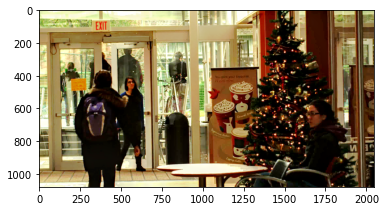

In [10]:

plt.imshow((out["hdr_image"][0][:, :, ::-1].clip(0, 1) * 255).astype(np.uint8))

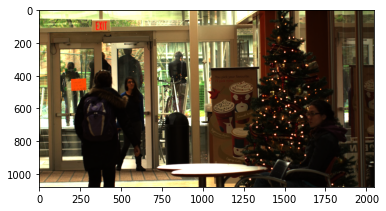

In [11]:
img = cv2.imread(img_path_list[0], flags=cv2.IMREAD_ANYDEPTH)
plt.imshow((img * 255).clip(0, 255).astype(np.uint8)[:, :, ::-1])

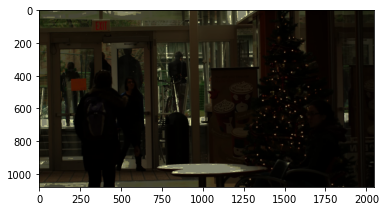

In [12]:
plt.imshow(out["exposure_list"][0][0][:, :, ::-1])

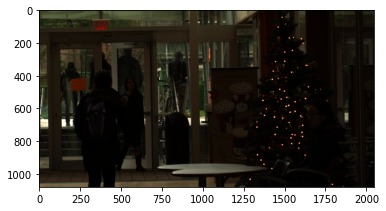

In [13]:
plt.imshow((exposure(img, -4) * 255).clip(0, 255).astype(np.uint8)[:, :, ::-1])

0 211 2.7491676613136575


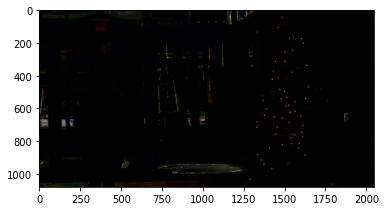

In [14]:
diff = (np.abs(out["exposure_list"][0][0][:, :, ::-1] / 255 - (exposure(img, -4)).clip(0, 1)[:, :, ::-1]) * 255).astype(np.uint8)
plt.imshow(diff)
print(diff.min(), diff.max(), diff.mean())

In [15]:
!mkdir -p ../resources/
cv2.imwrite("../resources/opencv_reconstructed.jpg", (out["hdr_image"][0].clip(0, 1) * 255).astype(np.uint8))
cv2.imwrite("../resources/ground_truth.jpg", (img.clip(0, 1) * 255).astype(np.uint8))
cv2.imwrite("../resources/hdr_diff.jpg", ((np.abs(out["hdr_image"][0] - img)) * 255).astype(np.uint8))

cv2.imwrite("../resources/4fstop_low_predict.jpg", out["exposure_list"][0][0])
cv2.imwrite("../resources/4fstop_low_gt.jpg", (exposure(img, -4).clip(0, 1) * 255).astype(np.uint8))
cv2.imwrite("../resources/4fstop_low_diff.jpg", (np.abs(out["exposure_list"][0][0] / 255 - (exposure(img, -4)).clip(0, 1)) * 255).astype(np.uint8))

cv2.imwrite("../resources/2fstop_low_predict.jpg", out["exposure_list"][0][1])
cv2.imwrite("../resources/2fstop_low_gt.jpg", (exposure(img, -2).clip(0, 1) * 255).astype(np.uint8))
cv2.imwrite("../resources/2fstop_low_diff.jpg", (np.abs(out["exposure_list"][0][1] / 255 - (exposure(img, -2)).clip(0, 1)) * 255).astype(np.uint8))

cv2.imwrite("../resources/2fstop_high_predict.jpg", out["exposure_list"][0][3])
cv2.imwrite("../resources/2fstop_high_gt.jpg", (exposure(img, 2).clip(0, 1) * 255).astype(np.uint8))
cv2.imwrite("../resources/2fstop_high_diff.jpg", (np.abs(out["exposure_list"][0][3] / 255 - (exposure(img, 2)).clip(0, 1)) * 255).astype(np.uint8))

cv2.imwrite("../resources/4fstop_high_predict.jpg", out["exposure_list"][0][4])
cv2.imwrite("../resources/4fstop_high_gt.jpg", (exposure(img, 4).clip(0, 1) * 255).astype(np.uint8))
cv2.imwrite("../resources/4fstop_high_diff.jpg", (np.abs(out["exposure_list"][0][4] / 255 - (exposure(img, 4)).clip(0, 1)) * 255).astype(np.uint8))


True